In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/fer2013.csv')

## Data Description
* emotion label (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
* 48 X 48 pixels 
* The training set consists of 28,709 examples. <br>The public test set used for the leaderboard consists of 3,589 examples.<br>The final test set, which was used to determine the winner of the competition, consists of another 3,589 examples.

In [3]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
data.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [5]:
pixels = data['pixels'].tolist()

In [6]:
import numpy as np

In [7]:
faces = []
# faces = np.array([])
for pixel_row in pixels:
    face = [int(pixel) for pixel in pixel_row.split(' ')]
    face = np.asarray(face).reshape(48, 48) # pixel size
    faces.append(face.astype('float32'))
#     faces = np.append(faces, face)

In [8]:
import matplotlib.pyplot as plt

In [9]:
faces = np.asarray(faces)

In [10]:
faces

array([[[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]],

       [[151., 150., 147., ..., 129., 140., 120.],
        [151., 149., 149., ..., 122., 141., 137.],
        [151., 151., 156., ..., 109., 123., 146.],
        ...,
        [188., 188., 121., ..., 185., 185., 186.],
        [188., 187., 196., ..., 186., 182., 187.],
        [186., 184., 185., ..., 193., 183., 184.]],

       [[231., 212., 156., ...,  44.,  27.,  16.],
        [229., 175., 148., ...,  27.,  35.,  27.],
        [214., 156., 157., ...,  28.,  22.,  28.],
        ...,
        [241., 245., 250., ...,  57., 101., 146.],
        [246., 250., 252., ...,  78., 105., 162.],
        [250., 251., 250., ...,  88., 110., 152.]],

       ...,

       [[ 17.,  17.,  16

In [11]:
faces[0]

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]], dtype=float32)

In [12]:
faces[0].shape

(48, 48)

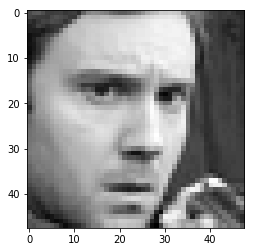

In [13]:
plt.imshow(faces[0], cmap='gray')

In [14]:
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1) 

emotions = pd.get_dummies(data['emotion']).as_matrix() # one - hot encoding label

/anaconda3/envs/facial-emotion-recognition/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [15]:
emotions

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [16]:
emotions.shape

(35887, 7)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=41)

In [19]:
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [20]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48

In [21]:
model = Sequential()

In [20]:
model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(7, activation='softmax'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
__________

In [22]:
model.compile(loss=categorical_crossentropy, 
             optimizer=Adam(),
             metrics = ['accuracy'])

In [23]:
tensorboard = TensorBoard(log_dir='./borad/sample_3')

In [24]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')

In [25]:
check_path = '{epoch:02d}-{val_acc:.2f}.h5'

In [26]:
checkpointer = ModelCheckpoint(check_path, monitor='val_loss', verbose=1, save_best_only=True)

In [27]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)

In [28]:
model.fit(np.array(X_train), np.array(y_train), 
          batch_size=batch_size,
         epochs=epochs,
         validation_data=(np.array(X_test), np.array(y_test)),
         shuffle=True,
         callbacks=[lr_reducer, tensorboard, early_stopper, checkpointer])

Train on 29068 samples, validate on 3589 samples
Epoch 1/100
29068/29068 [==============================] - 685s 24ms/step - loss: 3.8690 - acc: 0.2563 - val_loss: 2.3266 - val_acc: 0.2388

Epoch 00001: val_loss improved from inf to 2.32662, saving model to 01-0.24.h5
Epoch 2/100
29068/29068 [==============================] - 682s 23ms/step - loss: 2.4087 - acc: 0.3151 - val_loss: 2.1045 - val_acc: 0.3394

Epoch 00002: val_loss improved from 2.32662 to 2.10454, saving model to 02-0.34.h5
Epoch 3/100
29068/29068 [==============================] - 658s 23ms/step - loss: 2.2684 - acc: 0.3448 - val_loss: 1.9745 - val_acc: 0.3848

Epoch 00003: val_loss improved from 2.10454 to 1.97452, saving model to 03-0.38.h5
Epoch 4/100
29068/29068 [==============================] - 636s 22ms/step - loss: 2.2634 - acc: 0.3594 - val_loss: 2.2275 - val_acc: 0.3851

Epoch 00004: val_loss did not improve from 1.97452
Epoch 5/100
29068/29068 [==============================] - 635s 22ms/step - loss: 2.1960 - 


Epoch 00038: val_loss did not improve from 1.43016
Epoch 39/100
29068/29068 [==============================] - 620s 21ms/step - loss: 1.6666 - acc: 0.4904 - val_loss: 1.4420 - val_acc: 0.5091

Epoch 00039: val_loss did not improve from 1.43016
Epoch 00039: early stopping


In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(width, height, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dropout(.5))
model.add(Dense(7, activation='softmax'))

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(.5))
model.add(Dense(7, activation='softmax'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

In [43]:
from sklearn.cross_validation import StratifiedKFold

/anaconda3/envs/facial-emotion-recognition/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=41)

In [68]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [94]:
faces.shape

(35887, 48, 48)

In [70]:
emotions

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [93]:
for index, (train_indices, val_indices) in enumerate(skf.split(faces, data['emotion'])):
    # Generate batches from indices
    X_train, X_val = faces[train_indices], faces[val_indices]
    y_train, y_val = emotions[train_indices], emotions[val_indices]
    # Clear model, and create it
    model.fit(np.array(X_train), np.array(y_train), 
          batch_size=batch_size,
         epochs=epochs,
         validation_data=(np.array(X_val), np.array(y_val)),
         shuffle=True,
         callbacks=[lr_reducer, tensorboard, early_stopper, checkpointer])

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (28706, 48, 48)